# **네이버 영화 리뷰 - 데이터 분석**

1. 중복 데이터 제거

2. 비어있는(Null) 데이터 제거

3. 한글 이외의 문자 제거

4. 의미없는 데이터(불용어, stopword) 제거

5. 토큰화(형태소 분석)

6. 정수 인코딩

7. 패딩(글자수) 처리

8. 학습

구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


학습 데이터 다운로드

https://github.com/e9t/nsmc

In [ ]:
# 학습 데이터
import urllib.request
import pandas as pd

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", 
    filename='ratings_train.txt'
    )

train_data = pd.read_table('ratings_train.txt')
train_data = train_data.rename(columns={'document':'리뷰', 'label':'분류'})
train_data[:10]

,id,리뷰,분류
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [ ]:
len(train_data)

150000

검증 데이터 다운로드

In [ ]:
# 검증 데이터
import urllib.request
import pandas as pd

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", 
    filename='ratings_test.txt'
    )

test_data = pd.read_table('ratings_test.txt')
test_data = test_data.rename(columns={'document':'리뷰', 'label':'분류'})
test_data[:10]

,id,리뷰,분류
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [ ]:
len(test_data)

50000

중복 데이터 제거

In [ ]:
# padas를 이용하여 중복 데이터 제거 -> drop_duplicates 이용
train_data.drop_duplicates(subset=['리뷰'], inplace=True)

# Null값 제거
train_data = train_data.dropna(how='any')

In [ ]:
len(train_data)

146182

In [ ]:
# padas를 이용하여 중복 데이터 제거 -> drop_duplicates 이용
test_data.drop_duplicates(subset=['리뷰'], inplace=True)

# 누락(Null) 값 제거
# how: any 행 내에 어떤 값이라도 / all 행 내 모든 값이 null 일 경우 행을 날림
test_data = test_data.dropna(how='any')

In [ ]:
len(test_data)

49157

훈련 데이터 분류(긍정/부정) 확인

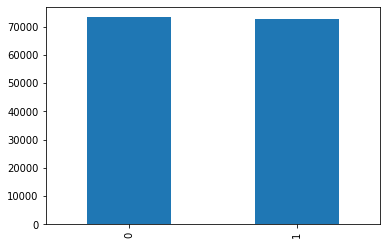

In [ ]:
# 긍정/부정 분류 데이터 그래프 확인
import matplotlib.pyplot as plt
train_data["분류"].value_counts().plot(kind="bar")

In [ ]:
# 긍정/부정 분류 데이터 개수 확인
train_data.groupby("분류").size().reset_index(name="개수")

,분류,개수
0,0,73342
1,1,72840


학습 데이터 전처리 - 한글을 제외한 나머지를 제거 후 생긴 공백을 제거

In [ ]:
import numpy as np

# 학습 데이터
train_data["리뷰"] = train_data["리뷰"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "") # 한글을 제외한 나머지 글자를 공백으로 변환
train_data["리뷰"].replace("", np.nan, inplace=True) # 누락 값 처리
train_data = train_data.dropna(how="any")            # 누락 값 처리

In [ ]:
len(train_data)

145791

검증 데이터 전처리 - 한글을 제외한 나머지를 제거 후 생긴 공백을 제거

In [ ]:
import numpy as np

# 검증 데이터
test_data["리뷰"] = test_data["리뷰"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "") # 한글을 제외한 나머지 글자를 공백으로 변환
test_data["리뷰"].replace("", np.nan, inplace=True) # 누락 값 처리
test_data = test_data.dropna(how="any")             # 누락 값 처리

In [ ]:
len(test_data)

48995

전처리 데이터 CSV파일로 저장

In [ ]:
# 학습 데이터 CSV file로 저장
train_data.to_csv("/content/drive/MyDrive/ml_data/NaverMovieReview/train_data.csv")
# 검증 데이터 CSV file로 저장
test_data.to_csv("/content/drive/MyDrive/ml_data/NaverMovieReview/test_data.csv")